In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def fit_fun(x):  # 适应函数
    return sum(100.0 * (x[0][1:] - x[0][:-1] ** 2.0) ** 2.0 + (1 - x[0][:-1]) ** 2.0)


In [3]:
class Particle:
    # 初始化
    def __init__(self, x_max, max_vel, dim):
        self.__pos = np.random.uniform(-x_max, x_max, (1, dim))  # 粒子的位置
        self.__vel = np.random.uniform(-max_vel, max_vel, (1, dim))  # 粒子的速度
        self.__bestPos = np.zeros((1, dim))  # 粒子最好的位置
        self.__fitnessValue = fit_fun(self.__pos)  # 适应度函数值

    def set_pos(self, value):
        self.__pos = value

    def get_pos(self):
        return self.__pos

    def set_best_pos(self, value):
        self.__bestPos = value

    def get_best_pos(self):
        return self.__bestPos

    def set_vel(self, value):
        self.__vel = value

    def get_vel(self):
        return self.__vel

    def set_fitness_value(self, value):
        self.__fitnessValue = value

    def get_fitness_value(self):
        return self.__fitnessValue

In [4]:
class PSO:
    def __init__(self, dim, size, iter_num, x_max, max_vel, tol, best_fitness_value=float('Inf'), C1=2, C2=2, W=1):
        self.C1 = C1
        self.C2 = C2
        self.W = W
        self.dim = dim  # 粒子的维度
        self.size = size  # 粒子个数
        self.iter_num = iter_num  # 迭代次数
        self.x_max = x_max
        self.max_vel = max_vel  # 粒子最大速度
        self.tol = tol  # 截至条件
        self.best_fitness_value = best_fitness_value
        self.best_position = np.zeros((1, dim))  # 种群最优位置
        self.fitness_val_list = []  # 每次迭代最优适应值

        # 对种群进行初始化
        self.Particle_list = [Particle(self.x_max, self.max_vel, self.dim) for i in range(self.size)]

    def set_bestFitnessValue(self, value):
        self.best_fitness_value = value

    def get_bestFitnessValue(self):
        return self.best_fitness_value

    def set_bestPosition(self, value):
        self.best_position = value

    def get_bestPosition(self):
        return self.best_position

    # 更新速度
    def update_vel(self, part):
        vel_value = self.W * part.get_vel() + self.C1 * np.random.rand() * (part.get_best_pos() - part.get_pos()) \
                    + self.C2 * np.random.rand() * (self.get_bestPosition() - part.get_pos())
        vel_value[vel_value > self.max_vel] = self.max_vel
        vel_value[vel_value < -self.max_vel] = -self.max_vel
        part.set_vel(vel_value)

    # 更新位置
    def update_pos(self, part):
        pos_value = part.get_pos() + part.get_vel()
        part.set_pos(pos_value)
        value = fit_fun(part.get_pos())
        if value < part.get_fitness_value():
            part.set_fitness_value(value)
            part.set_best_pos(pos_value)
        if value < self.get_bestFitnessValue():
            self.set_bestFitnessValue(value)
            self.set_bestPosition(pos_value)

    def update_ndim(self):

        for i in range(self.iter_num):
            for part in self.Particle_list:
                self.update_vel(part)  # 更新速度
                self.update_pos(part)  # 更新位置
            self.fitness_val_list.append(self.get_bestFitnessValue())  # 每次迭代完把当前的最优适应度存到列表
            print('第{}次最佳适应值为{}'.format(i, self.get_bestFitnessValue()))
            if self.get_bestFitnessValue() < self.tol:
                break

        return self.fitness_val_list, self.get_bestPosition()

第0次最佳适应值为55147232.710378
第1次最佳适应值为340683.04945018963
第2次最佳适应值为340683.04945018963
第3次最佳适应值为340683.04945018963
第4次最佳适应值为340683.04945018963
第5次最佳适应值为340683.04945018963
第6次最佳适应值为54111.46481479661
第7次最佳适应值为54111.46481479661
第8次最佳适应值为54111.46481479661
第9次最佳适应值为54111.46481479661
第10次最佳适应值为54111.46481479661
第11次最佳适应值为54111.46481479661
第12次最佳适应值为54111.46481479661
第13次最佳适应值为54111.46481479661
第14次最佳适应值为54111.46481479661
第15次最佳适应值为54111.46481479661
第16次最佳适应值为54111.46481479661
第17次最佳适应值为54111.46481479661
第18次最佳适应值为54111.46481479661
第19次最佳适应值为54111.46481479661
第20次最佳适应值为54111.46481479661
第21次最佳适应值为54111.46481479661
第22次最佳适应值为54111.46481479661
第23次最佳适应值为54111.46481479661
第24次最佳适应值为54111.46481479661
第25次最佳适应值为54111.46481479661
第26次最佳适应值为54111.46481479661
第27次最佳适应值为54111.46481479661
第28次最佳适应值为54111.46481479661
第29次最佳适应值为54111.46481479661
第30次最佳适应值为54111.46481479661
第31次最佳适应值为54111.46481479661
第32次最佳适应值为54111.46481479661
第33次最佳适应值为54111.46481479661
第34次最佳适应值为54111.46481479661
第35次最佳适应值为54111.46481479661

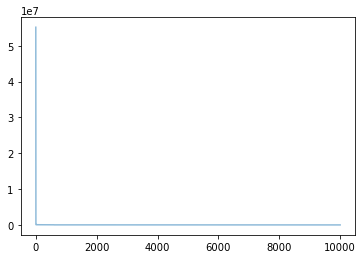

In [8]:
if __name__ == '__main__':
    # test 香蕉函数
    pso = PSO(4, 5, 10000, 30, 60, 1e-4, C1=2, C2=2, W=1)
    fit_var_list, best_pos = pso.update_ndim()
    print("最优位置:" + str(best_pos))
    print("最优解:" + str(fit_var_list[-1]))
    plt.plot(range(len(fit_var_list)), fit_var_list, alpha=0.5)
    plt.show()
